In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [ ]:
cars = pd.read_csv("Cars.csv")
cars.head()

In [ ]:
cars=pd.DataFrame(cars, columns=["HP","VOL","SP","WT","MPG"])
cars.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=cars, x="HP", ax=ax_box, orient="h")
ax_box.set(xlabel='')

sns.histplot(data=cars, x="HP", ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel="Density")

plt.tight_layout()
plt.show()


In [ ]:
#check for dublecation
cars[cars.duplicated()]

In [ ]:
#pair plot 
sns.set_style(style="darkgrid")
sns.pairplot(cars)

In [ ]:
cars.corr()

### observations from correlations plots and coeffcients ###
* Between X and Y , all the X variables shows moderate to high correlation strength , highest being between HP and MPG.


In [ ]:
#build model
#import statsmodels.formula.api as smf
model=smf.ols("MPG~WT+VOL+SP+HP",data=cars).fit()

In [ ]:
model.summary()

## Obsversation For model summary
* The R-squared and adjustedd R-suared values are good and about 75% of variability in y is explanied by X columns. 

## Performance metrics for model

In [ ]:
df1=pd.DataFrame()
df1["actual_y1"]=cars["MPG"]
df1.head()

In [ ]:
cars.iloc[:,0:4]

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()  # Initialize the model


In [ ]:
cars.head()

In [34]:
# Compute VIF values
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


### Observation
* the ideal range of vif vales shall between 0 to10 , However slightly higher values can be tolerated
* As seen from the very high fro VOL and WT, it is clear that they are prone to multicollinearity proble
* heance it is decided to drope one of the column

In [37]:
cars1 = cars.drop("WT", axis=1) 
cars1

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
76,322,50,169.598513,36.900000
77,238,115,150.576579,19.197888
78,263,50,151.598513,34.000000
79,295,119,167.944460,19.833733


In [39]:
import statsmodels.formula.api as smf
model2=smf.ols("MPG~VOL+SP+HP",data=cars1).fit()

In [41]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        09:45:31   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Performance metrix for model2

In [44]:
df2=pd.DataFrame()
df2["actual_y1"]=cars["MPG"]
df2.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [46]:
actual_y2=model2.predict(cars.iloc[:,0:4])
df2["actual_y2"]=actual_y2
df2.head()

,actual_y1,actual_y2
0,53.700681,43.590769
1,50.013401,42.256794
2,50.013401,42.256794
3,45.696322,42.361497
4,50.504232,42.269544


In [48]:
pred_y2=model2.predict(cars.iloc[:,0:4])
df2["pred_y2"]=pred_y2
df2.head()

,actual_y1,actual_y2,pred_y2
0,53.700681,43.590769,43.590769
1,50.013401,42.256794,42.256794
2,50.013401,42.256794,42.256794
3,45.696322,42.361497,42.361497
4,50.504232,42.269544,42.269544


In [50]:
from sklearn.metrics import mean_squared_error
mse =  mean_squared_error(df2["actual_y2"], df2["pred_y2"])
print("MSE :", mse)
print("RSME:",np.sqrt(mse))

MSE : 0.0
RSME: 0.0


In [52]:
cars1

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
76,322,50,169.598513,36.900000
77,238,115,150.576579,19.197888
78,263,50,151.598513,34.000000
79,295,119,167.944460,19.833733


#### Leverage (Hat Values):
* Leverage values diagnose if a data point has an extreme value in terms of the independent variables. A point with high leverage has a great ability to influence the regression line. The threshold for considering a point as having high leverage is typically set at 3(k+1)/n, where k is the number of predictors and n is the sample size.

In [55]:
k=3
n=81
leverage_cutoff=3*((k +1 )/n)
leverage_cutoff

0.14814814814814814

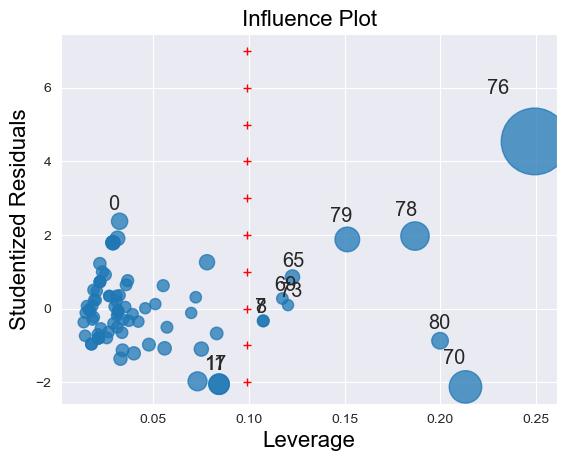

In [64]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2,alpha=.05)
leverage_cutoff = 2 * (k + 1) / n
y = list(range(-2, 8))
x = [leverage_cutoff] * len(y)  
plt.plot(x, y, 'r+')
plt.show()


In [72]:
cars1[cars1.index.isin([65,70,76,78,79,80])]


,HP,VOL,SP,MPG
65,165,50,126.598513,40.050000
70,280,50,164.598513,19.678507
76,322,50,169.598513,36.900000
78,263,50,151.598513,34.000000
79,295,119,167.944460,19.833733
80,236,107,139.840817,12.101263


In [80]:
cars2=cars1.drop(cars1.index[[65,70,76,78,79,80]],axis=0).reset_index(drop=True)
cars2

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
70,162,132,133.140074,23.203569
71,140,160,124.715241,19.086341
72,140,129,121.864163,19.086341
73,175,129,132.864163,18.762837


In [82]:
model3=smf.ols("MPG~VOL+SP+HP",data=cars2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           2.60e-33
Time:                        09:58:41   Log-Likelihood:                -187.46
No. Observations:                  75   AIC:                             382.9
Df Residuals:                      71   BIC:                             392.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6816     11.600      0.404      0.688     -18.448      27.811
VOL           -0.0952      0.021     -4.451      0.000      -0.138      -0.053
SP             0.6342      0.124      5.134      0.000       0.388       0.881
HP            -0.3350      0.034     -9.937      0.000      -0.402      -0.268
==============================================================================
Omnibus:                       20.724   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.198
Skew:                           1.233   Prob(JB):                     1.24e-06
Kurtosis:                       4.619   Cond. No.                     6.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
df3=pd.DataFrame()
df3["actual_y3"]=cars2["MPG"]
df3.head()

,actual_y3
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [90]:
pred_y3=model3.predict(cars.iloc[:,0: 3])
df3["pred_y3"]=pred_y3
df3.head()

,actual_y3,pred_y3
0,53.700681,45.872002
1,50.013401,44.385430
2,50.013401,44.385430
3,45.696322,44.433742
4,50.504232,44.421272


In [96]:
from sklearn.metrics import mean_squared_error
mse =  mean_squared_error(df3["actual_y3"], df3["pred_y3"])
print("MSE :", mse)
print("RSME :",np.sqrt(mse))

MSE : 10.376822850168518
RSME : 3.2213076304768715
